# Pandas cheatsheet
## Based on:
    - http://www.swegler.com/becky/blog/2014/08/06/useful-pandas-snippets/
    - https://duckduckgo.com/?q=Pandas+Cheat+Sheet&ia=cheatsheet&iax=1

In [24]:
from __future__ import print_function

import pandas as pd
import numpy as np

In [5]:
#Example dataframe
index = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=['A', 'B', 'C'])
df

A         B         C
2000-01-01 -0.352285 -0.138844 -0.145018
2000-01-02 -0.554239  0.487439  1.400899
2000-01-03  0.124197 -1.056361  1.477263
2000-01-04 -1.612095 -0.487586  0.094768
2000-01-05 -0.245037  0.162648 -0.373993
2000-01-06 -0.064234  0.864991 -0.050411
2000-01-07 -0.445774  1.456950  0.832168
2000-01-08 -2.234647  1.769125  0.718058

[8 rows x 3 columns]

In [25]:
#Iterate
for row in df.iterrows():
    print('index:', row[0], 'A:',row[1]['A'])


index: 2000-01-01 00:00:00 A: -0.352284774623
index: 2000-01-02 00:00:00 A: -0.554239374255
index: 2000-01-03 00:00:00 A: 0.12419725672
index: 2000-01-04 00:00:00 A: -1.61209481684
index: 2000-01-05 00:00:00 A: -0.245037329836
index: 2000-01-06 00:00:00 A: -0.0642339714032
index: 2000-01-07 00:00:00 A: -0.445774182274
index: 2000-01-08 00:00:00 A: -2.23464720931


In [ ]:
#Filter




In [81]:
#Calculate columns

#Dummy vars
df = pd.DataFrame(['a','a','b','b','c','c'], columns=['A'])
print(df)
dumm = pd.get_dummies(df['A'], prefix='dm')[['dm_a','dm_b']]
print(dumm)

   A
0  a
1  a
2  b
3  b
4  c
5  c

[6 rows x 1 columns]
   dm_a  dm_b
0     1     0
1     1     0
2     0     1
3     0     1
4     0     0
5     0     0

[6 rows x 2 columns]


In [ ]:
#Delete duplicates
df3 = df3[~df3.index.duplicated(keep='first')] #index


df4 = df3.drop_duplicates(subset='rownum', keep='last') #Acolumn

# Plot series

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

index = pd.date_range('1/1/2000', periods=8*24, freq='H')
s = [np.random.random()*i for i in range(8*24)]
serie = pd.Series(s, index=index)


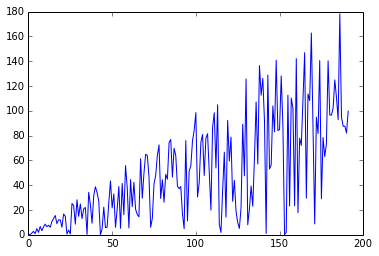

In [58]:
plt.plot(serie)

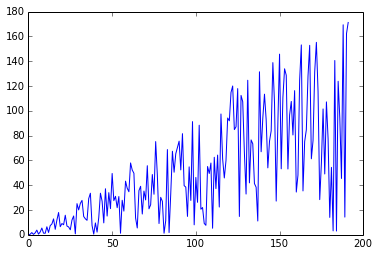

In [71]:
#plt.plot(serie[:24])
plt.plot(serie['1/1/2000'])
#plt.plot(serie['1/1/2000':'3/1/2000'])


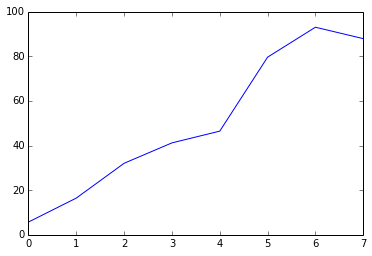

In [72]:
# Plot by day
serie_day = serie.resample('D')
plt.plot(serie_day)


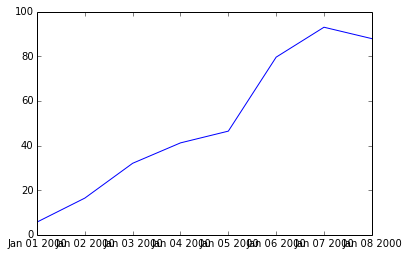

In [74]:
plt.plot_date(serie_day.index, serie_day, fmt='b')

In [ ]:
# List unique values in a DataFrame column
pd.unique(df.column_name.ravel())

# Convert Series datatype to numeric, getting rid of any non-numeric values
df['col'] = df['col'].astype(str).convert_objects(convert_numeric=True)

# Grab DataFrame rows where column has certain values
valuelist = ['value1', 'value2', 'value3']
df = df[df.column.isin(valuelist)]

# Grab DataFrame rows where column doesn't have certain values
valuelist = ['value1', 'value2', 'value3']
df = df[~df.column.isin(value_list)]

# Delete column from DataFrame
del df['column']

# Select from DataFrame using criteria from multiple columns
# (use `|` instead of `&` to do an OR)
newdf = df[(df['column_one']>2004) & (df['column_two']==9)]

# Rename several DataFrame columns
df = df.rename(columns = {
    'col1 old name':'col1 new name',
    'col2 old name':'col2 new name',
    'col3 old name':'col3 new name',
})

# Lower-case all DataFrame column names
df.columns = map(str.lower, df.columns)

# Even more fancy DataFrame column re-naming
# lower-case all DataFrame column names (for example)
df.rename(columns=lambda x: x.split('.')[-1], inplace=True)

# Loop through rows in a DataFrame
# (if you must)
for index, row in df.iterrows():
    print index, row['some column']  

# Next few examples show how to work with text data in Pandas.
# Full list of .str functions: http://pandas.pydata.org/pandas-docs/stable/text.html

# Slice values in a DataFrame column (aka Series)
df.column.str[0:2]

# Lower-case everything in a DataFrame column
df.column_name = df.column_name.str.lower()

# Get length of data in a DataFrame column
df.column_name.str.len()

# Sort dataframe by multiple columns
df = df.sort(['col1','col2','col3'],ascending=[1,1,0])

# Get top n for each group of columns in a sorted dataframe
# (make sure dataframe is sorted first)
top5 = df.groupby(['groupingcol1', 'groupingcol2']).head(5)

# Grab DataFrame rows where specific column is null/notnull
newdf = df[df['column'].isnull()]

# Select from DataFrame using multiple keys of a hierarchical index
df.xs(('index level 1 value','index level 2 value'), level=('level 1','level 2'))

# Change all NaNs to None (useful before
# loading to a db)
df = df.where((pd.notnull(df)), None)

# Get quick count of rows in a DataFrame
len(df.index)

# Pivot data (with flexibility about what what
# becomes a column and what stays a row).
# Syntax works on Pandas >= .14
pd.pivot_table(
  df,values='cell_value',
  index=['col1', 'col2', 'col3'], #these stay as columns; will fail silently if any of these cols have null values
  columns=['col4']) #data values in this column become their own column

# Change data type of DataFrame column
df.column_name = df.column_name.astype(np.int64)

# Get rid of non-numeric values throughout a DataFrame:
for col in refunds.columns.values:
  refunds[col] = refunds[col].replace('[^0-9]+.-', '', regex=True)

# Set DataFrame column values based on other column values (h/t: @mlevkov)
df.loc[(df['column1'] == some_value) & (df['column2'] == some_other_value), ['column_to_change']] = new_value

# Clean up missing values in multiple DataFrame columns
df = df.fillna({
    'col1': 'missing',
    'col2': '99.999',
    'col3': '999',
    'col4': 'missing',
    'col5': 'missing',
    'col6': '99'
})

# Concatenate two DataFrame columns into a new, single column
# (useful when dealing with composite keys, for example)
df['newcol'] = df['col1'].map(str) + df['col2'].map(str)

# Doing calculations with DataFrame columns that have missing values
# In example below, swap in 0 for df['col1'] cells that contain null
df['new_col'] = np.where(pd.isnull(df['col1']),0,df['col1']) + df['col2']

# Split delimited values in a DataFrame column into two new columns
df['new_col1'], df['new_col2'] = zip(*df['original_col'].apply(lambda x: x.split(': ', 1)))

# Collapse hierarchical column indexes
df.columns = df.columns.get_level_values(0)

# Convert Django queryset to DataFrame
qs = DjangoModelName.objects.all()
q = qs.values()
df = pd.DataFrame.from_records(q)

# Create a DataFrame from a Python dictionary
df = pd.DataFrame(list(a_dictionary.items()), columns = ['column1', 'column2'])

# Get a report of all duplicate records in a dataframe, based on specific columns
dupes = df[df.duplicated(['col1', 'col2', 'col3'], keep=False)]

# Set up formatting so larger numbers aren't displayed in scientific notation (h/t @thecapacity)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
#Reading and Writing Methods

df=pd.read_csv('Anyname.csv')
#Reading a CSV file
df.to_csv(Newfile.csv)
#Writing content of dataframe to CSV file

df=pd.read_excel('File_Name.xlsx','sheet1')
#Reading an Excel file
df.to_excel('Abc.xlsx',sheet_name='sheet2')
#Writing content of dataframe to Excel file

In [ ]:
#Getting Preview of Dataframe

df.head(n)
#Looking at top n records
df.tail(n)
#Looking at bottom n records
df.columns
#View columns name

In [ ]:
#Rename Columns of Dataframe

df2=df.rename(columns={'old_columnname':'new_columnname'})
#Create a new dataframe
df.rename(columns={'old_columnname':'new_columnname',inplace=True}
#To rename the column of existing dataframe

In [ ]:
#Selecting Columns and Rows
          
df[['column1','column2']]
#Accessing sub dataframes
df[df['column1']>10]
#Filtering Records
df[(df['column1']>10) & df['column2']==50]
#Filtering Records using &(and)
df[(df['column1']>10) | df['column2']==50]
#Filtering Records using |(or)

In [ ]:
#Aggregate

df.groupby('column1'.sum()) df.groupby(['column1','column2']).count()
#Spliting the data into groups and apply fucntions to each groups indivdually
pd.pivot_table(df,values='column1',index=['column2','column3'],columns=['column4'])
#Pivot table helps to genrate data structure. it has three components index, columns and values
pd.pivot_table(df,values='column1',index=['column2','column3'],columns=['column4'],aggfunc=len
#To find count in column in Pivot table
pd.crosstab(df.column1,df.column2)
#Crosstab computes the simple cross tabulation of two factors

In [ ]:
#Creating New Columns

df['NewColumn1']=df['column2']
#Create a copy of existing column2
df['NewColumn2']=df['column2']+10
#Add 10 to existing column2 then create new column
df['NewColumn3']=df['column1']+df['column2']
#Add elements of column1 and column2 then create new column

In [ ]:
#Handling Missing Values

df1.dropna()
#Drop rows and columns having missing data
df2.filna(value=5)
#Replace all missing values with 5
mean=df2['column1'].mean()
#Find mean value of column
df2['column1'].filna(mean)
#Replace all the missing values of column1 with mean of available values

In [ ]:
#Merging/Concatinating Dataframes

pd.concat([df1,df2])
#Concatinate two or more dataframes based on columns
pd.merge(df1,df2,on='column1',how='inner') pd.merge(df1,df2,on='column1',how='left') pd.merge(df1,df2,on='column1',how='right')
#We can perform right, left and inner joins also

In [ ]:
#Applying Functions to Dataframes

df['column1'].map(lambda x:10+x)
#Map: This will add 10 to each element of column1
df['column1'].map(lambda x:'hello'+x)
#Concatinate 'hello' at the beginning of each elements
df[['column1','column2']].apply(sum)
#Apply: Applies a fucntion along any axis of the dataframe

In [ ]:
#Identify Unique Values
df['column1'].unique()

In [ ]:
#Basic Statical Methods

df.describe()
#Returns a quick stats(count, mean, std, min, first quartile) on suitable columns
df.cov()
#Returns co-variance between suitable columns
df.corr()
#Returns co-relation between suitable columns
